## News Mood

The first plot will be and/or feature the following:


Be a scatter plot of sentiments of the last 100 tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
Each plot point will reflect the compound sentiment of a tweet.
Sort each plot point by its relative timestamp.


The second plot will be a bar plot visualizing the overall sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, and VADER.

Your final Jupyter notebook must:


Pull last 100 tweets from each outlet.
Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
Pull into a DataFrame the tweet's source account, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
Export the data in the DataFrame into a CSV file.
Save PNG images for each plot.


As final considerations:


You must complete your analysis using a Jupyter notebook.
You must use the Matplotlib or Pandas plotting libraries.
Include a written description of three observable trends based on the data.
Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.

In [20]:
# Dependencies
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
#import Twitter_API_Keys
import seaborn as sns

In [21]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [22]:
# Twitter API Keys
consumer_key = "r88UzgUheSOF3pMyINIT5yITY"
consumer_secret = "kq3NV0k5Dlq4uCucw5Nf0sJAuP09l0Xja1pNc1DenZoxWSKwxk"
access_token = "421125873-OuCvIPTHHMqC9t8uG8CTSBLi7iK4NNEyZeDQMc9w"
access_token_secret = "EC2ookZjWBWKo5MpCoEEtrg2OGiF8WZZ1LCiv4nxl45tH"

In [26]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Select News Sources (Twitter Accounts)
news_source = ["FoxNews","CNN","BBCWorld","CBSNews","nytimes"]

In [28]:
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
tweets_ago = []
screen_name = []


for user in news_source:
    public_tweets = api.user_timeline(id=user, 
                               count=100)
    counter = 0
    
    for tweet in public_tweets:
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        scr_name = tweet["user"]['screen_name']
        
        tweets_ago.append(counter)
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        screen_name.append(scr_name)
        
        counter = counter + 1
        
    print(f"{user} complete")



FoxNews complete
CNN complete
BBCWorld complete
CBSNews complete
nytimes complete


In [32]:
# Convert sentiment to DataFrame
final_sentiment_output = pd.DataFrame({"screen_name": screen_name, "tweets_ago": tweets_ago, "compound_score": compound_list, "positive_score": positive_list, "negative_score": negative_list, "neutral_score": neutral_list })
final_sentiment_output.head()

,screen_name,tweets_ago,compound_score,positive_score,negative_score,neutral_score
0,FoxNews,0,0.0000,0.000,0.000,1.000
1,FoxNews,1,0.0000,0.000,0.000,1.000
2,FoxNews,2,0.1477,0.081,0.000,0.919
3,FoxNews,3,-0.7096,0.000,0.424,0.576
4,FoxNews,4,0.6597,0.265,0.000,0.735


In [34]:
#Export the new CSV
final_sentiment_output.to_csv(".csv", index=False)

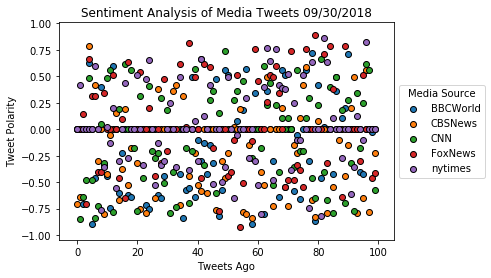

In [41]:
group_names = final_sentiment_output.groupby('screen_name')

for name in group_names.groups.keys():

    df = final_sentiment_output[final_sentiment_output['screen_name'] == name]
    plt.scatter(        
            x=df['tweets_ago'],
            y=df['compound_score'],
            label = name,
            edgecolor='black'
    )
    
plt.legend(title="Media Source", loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Media Tweets 09/30/2018")
plt.savefig("final_scatter_plot.png", bbox_inches='tight')
plt.show()



In [38]:
summary_of_sentiments = group_names['compound_score'].mean()
final_summary_df = pd.DataFrame(summary_of_sentiments)
final_summary_df

,compound_score
screen_name,
BBCWorld,-0.121378
CBSNews,-0.169920
CNN,-0.046864
FoxNews,0.045205
nytimes,0.014041


# Sentiment Bar graph

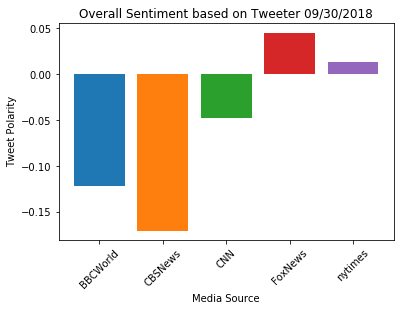

In [42]:
counter = 0

for x in range(len(final_summary_df)):
    plt.bar(
        x,
        height = final_summary_df.values[counter],
        label = final_summary_df.index[counter],
    )
    counter = counter + 1

x_pos = [item for item in range(len(final_summary_df))]
bar_labels = final_summary_df.index
plt.xticks(x_pos, bar_labels, rotation= '45')
plt.ylabel("Tweet Polarity")
plt.xlabel("Media Source")
plt.title("Overall Sentiment based on Tweeter 09/30/2018")
plt.savefig("summary_bar_plot.png", bbox_inches='tight')
plt.show()



In [ ]:
Observations from 09/30/2018:

1. CBS News had the most negative compound score compared to the other news outlets.
2. NY Times is currently tweeting neutral.
3. Fox News is currently tweeting positive tweets has the positive tweets.